<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU53_impacto de las políticas de inversión en sanidad, infraestructuras y promoción turística en el SPI			</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.3.- Data Cleansing - Outliers</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

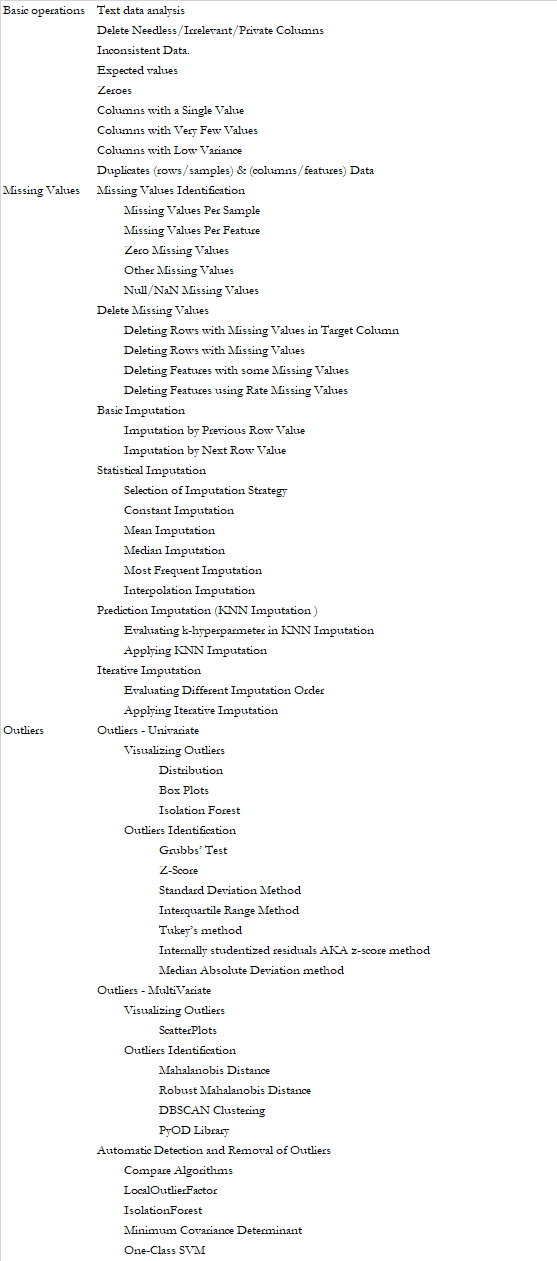


## Consideraciones casos CitizenLab programados en R

* La mayoría de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_53_09.2_02_spi</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_CTYPE=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8;LC_COLLATE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_ES.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_ES.UTF-8;LC_IDENTIFICATION=C"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
# library(sf)
library(tidyr)
library(stringr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_53_09.2_02_spi.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_53_09.2_02_spi.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 2028 Columns: 18
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (17): rank_score_spi, score_spi, score_bhn, score_fow, score_opp, score_...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 2,028
Columns: 18
$ rank_score_spi <dbl> 80, 97, 46, 84, 99, 150, 74, 105, 36, 143, 154, 69, 168…
$ score_spi      <dbl> 67.59, 60.10, 73.96, 62.86, 61.43, 45.57, 66.56, 59.45,…
$ score_bhn      <dbl> 79.16, 74.55, 81.88, 79.45, 77.84, 47.15, 80.41, 66.16,…
$ score_fow      <dbl> 65.40, 51.25, 70.69, 61.22, 57.63, 45.21, 62.82, 54.62,…
$ score_opp      <dbl> 58.22, 54.49, 69.32, 47.92, 48.83, 44.34, 56.46, 57.56,…
$ score_nbmc     <dbl> 86.67, 72.88, 86.33, 83.91, 87.72, 54.66, 92.38, 72.21,…
$ score_ws       <dbl> 86.44, 83.35, 88.07, 77.71, 78.15, 47.82, 78.47, 66.32,…
$ score_sh       <dbl> 87.69, 77.17, 89.59, 85.11, 86.61, 36.59, 85.21, 75.91,…
$ score_ps       <dbl> 55.85, 64.81, 63.55, 71.08, 58.87, 49.53, 65.57, 50.21,…
$ score_abk      <dbl> 74.20, 47.04, 89.07, 65.15, 55.79, 50.36, 81.61, 68.71,…
$ score_aic      <dbl> 74.19, 37.15, 68.14, 51.25, 78.17, 33.84, 61.95, 56.61,…
$ score_hw       <dbl> 53.55, 64.58, 61.41, 62.00, 45.35, 36.99, 61.64, 41.87,…
$ score_eq      

Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

rank_score_spi,score_spi,score_bhn,score_fow,score_opp,score_nbmc,score_ws,score_sh,score_ps,score_abk,score_aic,score_hw,score_eq,score_pr,score_pfc,score_incl,score_aae,is_train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
80,67.59,79.16,65.40,58.22,86.67,86.44,87.69,55.85,74.20,74.19,53.55,59.66,81.60,60.29,40.24,50.73,TRUE
97,60.10,74.55,51.25,54.49,72.88,83.35,77.17,64.81,47.04,37.15,64.58,56.22,71.05,64.77,56.12,26.03,TRUE
46,73.96,81.88,70.69,69.32,86.33,88.07,89.59,63.55,89.07,68.14,61.41,64.13,90.28,67.65,68.48,50.87,TRUE
84,62.86,79.45,61.22,47.92,83.91,77.71,85.11,71.08,65.15,51.25,62.00,66.47,61.56,56.51,48.70,24.90,TRUE
99,61.43,77.84,57.63,48.83,87.72,78.15,86.61,58.87,55.79,78.17,45.35,51.22,60.41,58.62,35.57,40.72,TRUE


## Outliers - Univariate

### Visualizing Outliers

#### Distribution

<font color='tomato'>Selecting feature to analyze</font>

In [9]:
# Selecting feature to analyze
column_name <- "rank_score_spi"

<font color='darkgrey'><b>Operation</font>

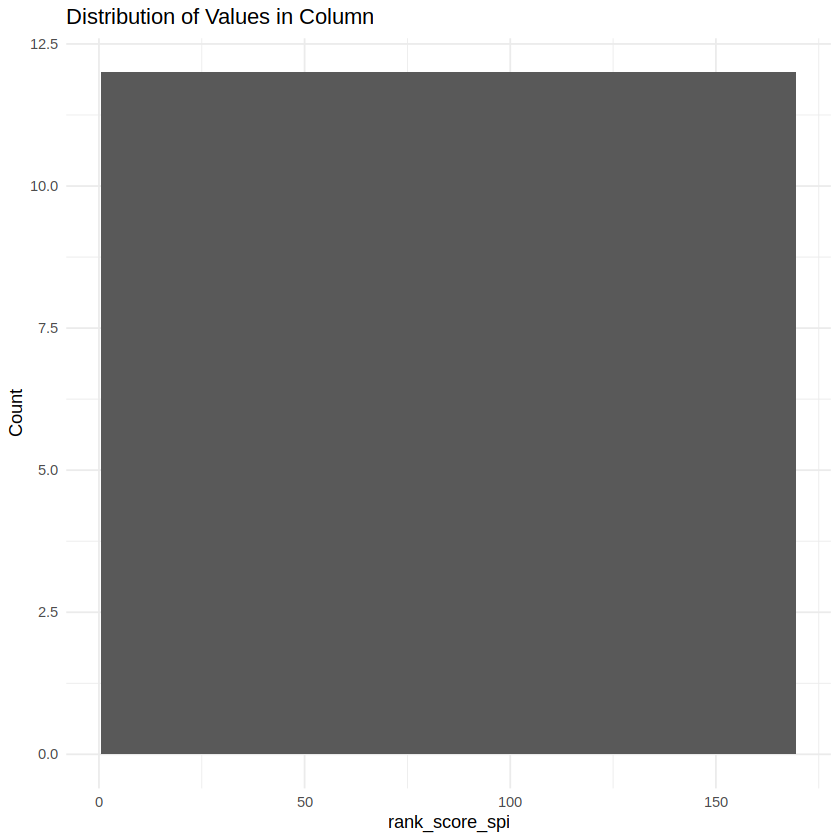

In [10]:
# Create a histogram plot
ggplot(data, aes(x = data[[column_name]])) +
  geom_histogram(binwidth = 1) +
  labs(x = column_name, y = "Count") +
  ggtitle("Distribution of Values in Column") +
  theme_minimal()

#### Box Plots
Are great to summarize and visualize the distribution of variables easily and quickly.

<font color='tomato'>Selecting feature to analyze</font>

In [11]:
# Selecting feature to analyze
column_name <- "rank_score_spi"

<font color='darkgrey'><b>Operation</font>

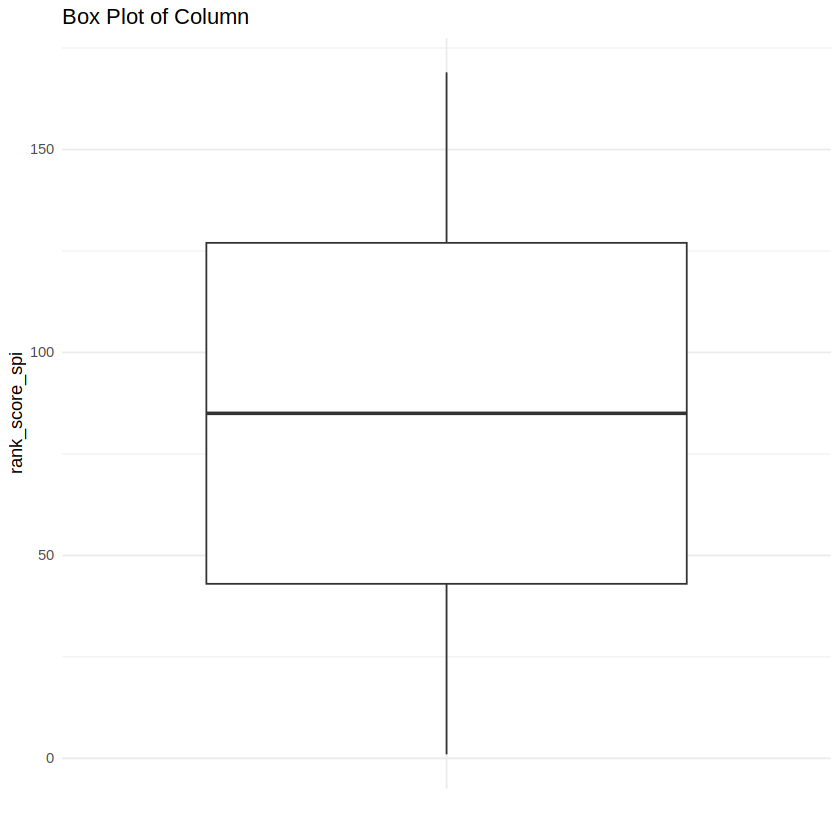

In [12]:
# Analyze specifics features
# Create a box plot
ggplot(data, aes(x = "", y = data[[column_name]])) +
  geom_boxplot() +
  labs(x = "", y = column_name) +
  ggtitle("Box Plot of Column") +
  theme_minimal()


#### Isolation Forest

<font color='tomato'>Selecting feature to analyze</font>

In [13]:
# Selecting feature to analyze


<font color='darkgrey'><b>Operation</font>

### Outliers Identification

#### Grubbs’ Test

<font color='tomato'>Selecting feature to analyze</font>

In [14]:
# Selecting feature to analyze
column_name <- "rank_score_spi"

<font color='darkgrey'><b>Operation</font>

In [15]:
library(outliers)
outliers <- grubbs.test(data[[column_name]], opposite = FALSE)
print(outliers)


	Grubbs test for one outlier

data:  data[[column_name]]
G = 1.72141, U = 0.99854, p-value = 1
alternative hypothesis: highest value 169 is an outlier



#### Z-Score

<font color='tomato'>Selecting feature to analyze</font>

In [16]:
# Selecting feature to analyze
column_name <- "rank_score_spi"

<font color='darkgrey'><b>Operation</font>

In [17]:
# Define a threshold to identify an outlier.
# List of row numbers with outlier 
# Choose the numeric column from your data

# Calculate the z-score
z_scores <- data %>% select(all_of(column_name)) %>% scale()

# Define a threshold for identifying outliers (e.g., z-score > 5 or z-score < -5)
threshold <- 5

# Find the row numbers with z-scores exceeding the threshold
outlier_rows <- which(abs(z_scores) > threshold)

# Print the row numbers with outliers
print(outlier_rows)

data_cleaned <- subset(data, !(row.names(data) %in% outlier_rows))


integer(0)


#### Standard Deviation Method

<font color='tomato'>Selecting feature to analyze</font>

In [18]:
# Selecting all features to analyze
column_name <- "rank_score_spi"

<font color='darkgrey'><b>Operation</font>

In [19]:
# # identify outliers with standard deviation
# # Choose the numeric column from your data
# column_name_df <- data[[column_name]]

# # Calculate the mean and standard deviation of the column
# column_mean <- mean(column_name_df)
# column_sd <- sd(column_name_df)

# # Define the threshold as a multiple of the standard deviation (e.g., 3 times the standard deviation)
# threshold <- 3

# # Identify the outliers based on the threshold
# outlier_rows <- which(column_name_df > (column_mean + threshold * column_sd) | column_name_df < (column_mean - threshold * column_sd))

# # Print the updated column with outliers removed
# print(outlier_rows)

# data_cleaned <- subset(data, !(row.names(data) %in% outlier_rows))

#### Interquartile Range Method

<font color='tomato'>Selecting factor k</font>

In [20]:
# Selecting factor k
column_name <- "rank_score_spi"
threshold <- 1.5

<font color='darkgrey'><b>Operation</font>

In [21]:
# identify outliers with standard deviation
# Choose the numeric column from your data
# column_name_df <- data[[column_name]]

# # Calculate the first quartile (Q1) and third quartile (Q3)
# Q1 <- quantile(column_name_df, 0.25)
# Q3 <- quantile(column_name_df, 0.75)

# # Calculate the IQR (Interquartile Range)
# IQR <- Q3 - Q1

# # Identify the outliers based on the threshold
# outlier_rows <- which(column_name_df < (Q1 - threshold * IQR) | column_name_df > (Q3 + threshold * IQR))
# print(outlier_rows)
# data_cleaned <- subset(data, !(row.names(data) %in% outlier_rows))

#### Tukey’s method

In [22]:
#Tukey's method
# column_name <- "presMax"

# column_name_df <- data[[column_name]]
# # Calculate the first quartile (Q1) and third quartile (Q3)
# Q1 <- quantile(column_name_df, 0.25)
# Q3 <- quantile(column_name_df, 0.75)

# # Calculate the interquartile range (IQR)
# IQR <- Q3 - Q1

# # Define the multiplier for Tukey's method (e.g., 1.5 times the IQR)
# multiplier <- 1.5

# # Calculate the lower and upper bounds for outliers
# lower_bound <- Q1 - multiplier * IQR
# upper_bound <- Q3 + multiplier * IQR

# # Identify the outliers based on the bounds
# outlier_rows <- which(column_name_df < lower_bound | column_name_df > upper_bound)

# # Print the updated column with outliers removed
# print(outlier_rows)
# data_cleaned <- subset(data, !(row.names(data) %in% outlier_rows))

#### Internally studentized residuals AKA z-score method

In [23]:
#Internally studentized method (z-score)


#### Median Absolute Deviation method

In [24]:
#MAD method
# column_name <- "presMax"

# column_name_df <- data[[column_name]]
# # Calculate the median absolute deviation (MAD)
# mad <- median(abs(column_name_df - median(column_name_df, na.rm = TRUE)), na.rm = TRUE)

# # Define a threshold for identifying outliers (e.g., 3 times the MAD)
# threshold <- 3 * mad

# # Identify the outliers based on the MAD
# outliers <- which(abs(column_name_df - median(column_name_df, na.rm = TRUE)) > threshold)

# # Print the updated column with outliers removed
# print(outliers)
# data_cleaned <- subset(data, !(row.names(data) %in% outliers))

## Outliers - MultiVariate

### Visualizing Outliers
ScatterPlots: a common way to plot multivariate outliers is the scatter plot.

#### ScatterPlots
A common way to plot multivariate outliers is the scatter plot.

<font color='tomato'>Selecting feature to analyze</font>

In [25]:
# Selecting feature to analyze


<font color='darkgrey'><b>Operation</font>

### Outliers Identification

#### Mahalanobis Distance

<font color='tomato'>Selecting feature to analyze</font>

In [26]:
# Selecting features to analyze


<font color='darkgrey'><b>Operation</font>

In [27]:
# Analyze selected features


In [28]:
# Analyze all dataset


#### Robust Mahalanobis Distance

In [29]:
#Robust Mahalonibis Distance


<font color='tomato'>Selecting feature to analyze</font>

In [30]:
# Selecting features to analyze


<font color='darkgrey'><b>Operation</font>

In [31]:
# Analyze selected features


In [32]:
# Analyze all dataset


#### DBSCAN Clustering

<font color='tomato'>Selecting feature to analyze</font>

In [33]:
# Selecting feature to analyze


<font color='darkgrey'><b>Operation</font>

In [34]:
# specify & fit model


In [35]:
# visualize outputs


In [36]:
# outliers dataframe


In [37]:
# Index of rows with outliers


In [38]:
# Outliers Dataframe


## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [39]:
data_to_save <- data_cleaned


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 09.3

In [40]:
caso <- "CU_53"
proceso <- '_09.3'
tarea <- "_02"
archivo <- ""
proper <- "_spi" 
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [41]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [42]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [43]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están limpios para el despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>